In [24]:
import numpy as np
import numba
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# $\frac{d^2\theta}{dt^2} = -\omega_0^2\sin\theta -\alpha\frac{d\theta}{dt} + f\cos\omega t$

In [25]:
from typing import Callable


def make_pendulum_ode_func(
    omega_0: float, alpha: float, f: float, omega: float
) -> Callable[[float, np.ndarray], np.ndarray]:
    def ode_func(t: float, x: np.ndarray) -> np.ndarray:
        theta, dtheta = x

        d2theta = (
            -(omega_0**2) * np.sin(theta) - alpha * dtheta + f * np.cos(omega * t)
        )

        return np.array([dtheta, d2theta])

    return ode_func

In [26]:
def solve_pendulum(
    t: np.ndarray,
    y0: np.ndarray,
    omega_0: float,
    alpha: float,
    f: float,
    omega: float = np.pi,
) -> tuple[np.ndarray, np.ndarray]:
    """[theta, dtheta]"""
    pendulum = make_pendulum_ode_func(omega_0, alpha, f, omega)

    t_min = 0
    t_max = np.max(t)

    sol = solve_ivp(pendulum, [t_min, t_max], y0, t_eval=t)

    theta = sol.y[0, :]
    dtheta = sol.y[1, :]

    return theta, dtheta

In [31]:
t = np.linspace(0, 10, 100)
theta_0 = 0.1
dtheta_0 = 0.05
y0 = np.array([theta_0, dtheta_0])
theta, dtheta = solve_pendulum(t, y0, 1, 0, 0)

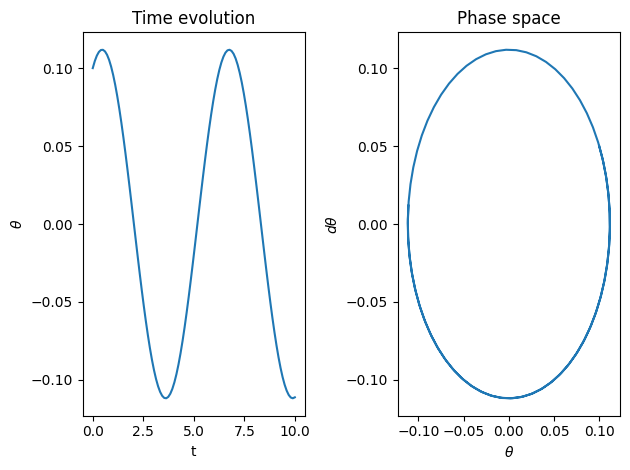

In [32]:
plt.figure()

plt.subplot(1, 2, 1)
plt.plot(t, theta)
plt.xlabel("t")
plt.ylabel("$\\theta$")
plt.title("Time evolution")

plt.subplot(1, 2, 2)
plt.plot(theta, dtheta)
plt.xlabel("$\\theta$")
plt.ylabel("$d\\theta$")
plt.title("Phase space")

plt.tight_layout()
plt.show()